In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 500)
sns.set_style(style='darkgrid') 

In [3]:
df_json = pd.read_json('https://api.covid19india.org/states_daily.json')
df_json.head()

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."


In [4]:
vals = [dict(v[0]) for v in list(df_json.values)]

In [5]:
df_raw = pd.DataFrame(vals)

In [6]:
df_confirm = df_raw[df_raw['status']=='Confirmed'][['date', 'tt']]
df_confirm.tt = pd.to_numeric(df_confirm.tt)
df_confirm['total'] = df_confirm.tt.cumsum() 
df_confirm['PctChange'] = np.round(df_confirm.total.pct_change() * 100, 2)
df_confirm.columns = ['Date', 'NewCases', 'Total', 'Percent Change']
df_confirm['Days to double'] = 70 / df_confirm['Percent Change']
df_confirm.reset_index(inplace=True, drop=True)
df_confirm.tail(10)

,Date,NewCases,Total,Percent Change,Days to double
43,26-Apr-20,1607,27889,6.11,11.456628
44,27-Apr-20,1568,29457,5.62,12.455516
45,28-Apr-20,1902,31359,6.46,10.835913
46,29-Apr-20,1705,33064,5.44,12.867647
47,30-Apr-20,1801,34865,5.45,12.844037
48,01-May-20,2381,37246,6.83,10.248902
49,02-May-20,2564,39810,6.88,10.174419
50,03-May-20,2952,42762,7.42,9.433962
51,04-May-20,3656,46418,8.55,8.187135
52,05-May-20,2971,49389,6.40,10.937500


In [7]:
p = np.poly1d(np.polyfit(np.array(df_confirm.index), np.array(df_confirm['Days to double'].fillna(0)), 4))

df_confirm['double_trend'] = p(df_confirm.index)
df_confirm.head()

,Date,NewCases,Total,Percent Change,Days to double,double_trend
0,14-Mar-20,81,81,NaN,NaN,2.218817
1,15-Mar-20,27,108,33.33,2.100210,2.705661
2,16-Mar-20,15,123,13.89,5.039597,3.104321
3,17-Mar-20,11,134,8.94,7.829978,3.424809
4,18-Mar-20,37,171,27.61,2.535313,3.676687


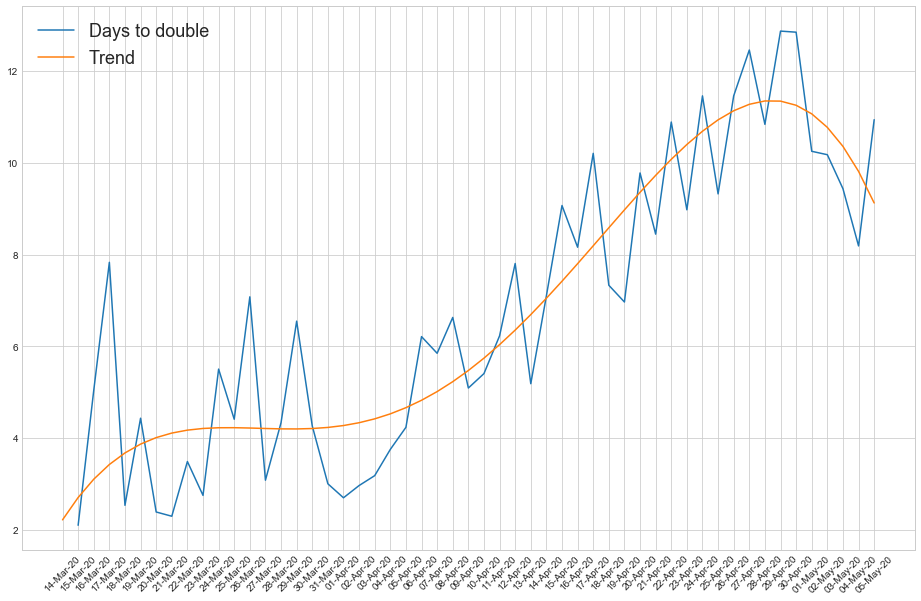

In [10]:
plt.figure(figsize=(16, 10))
plt.style.use('seaborn-whitegrid')
#df_confirm.plot(x='Date', y='Days to double')
plt.plot(df_confirm['Date'], df_confirm['Days to double'], label = 'Days to double')
plt.plot(df_confirm['Date'], df_confirm['double_trend'], label = 'Trend')

plt.legend(fontsize=18)
plt.xticks(rotation=45)
plt.show()